# 103.5. Image display with Firefly

<div>
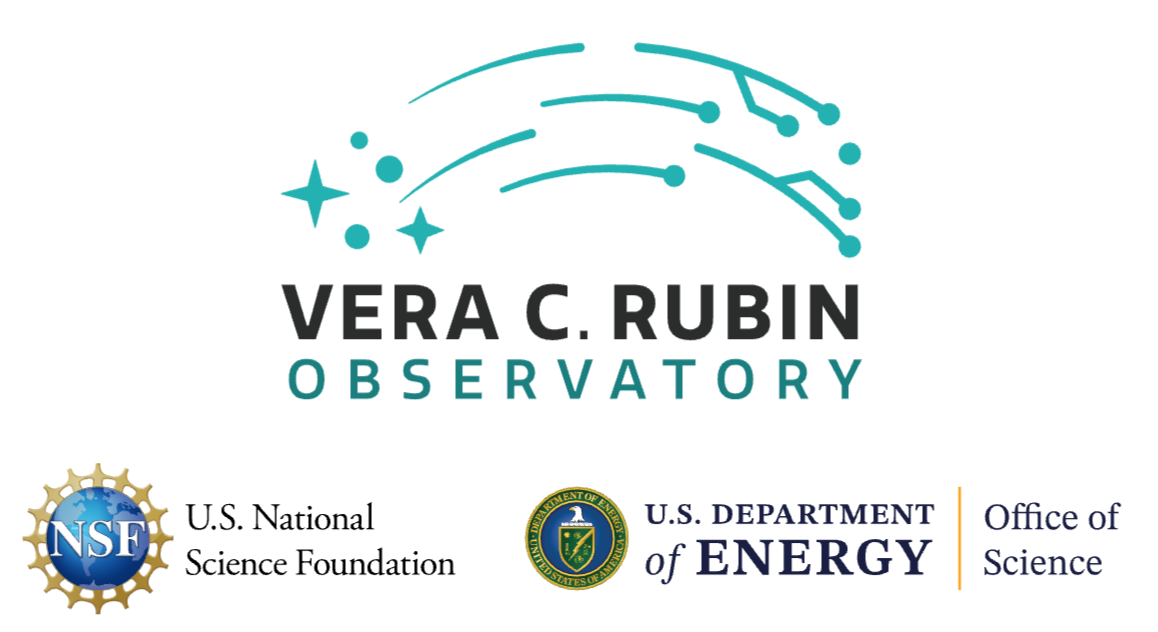
</div>
For the Rubin Science Platform at data.lsst.cloud. <br>
Data Release: <a href="https://dp1.lsst.io">Data Preview 1</a> <br>
Container Size: large <br>
LSST Science Pipelines version: v29.1.1 <br>
Last verified to run: 2025-06-26 <br>
Repository: <a href="https://github.com/lsst/tutorial-notebooks">github.com/lsst/tutorial-notebooks</a> <br>

**Learning objective:** How to use the Firefly interactive image display tool.

**LSST data products:** `deep_coadd`, `visit_image`

**Packages:** `lsst.daf.butler`

**Credit:** Originally developed by the Rubin Community Science team.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the 
<a href="https://community.lsst.org/c/support">Support Category</a> 
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

Firefly is an interactive web user interface for astronomers that provides a table display, FITS/HiPS image visualization, and customizable 2D plots.
All three highly interactive components can be used together on the same data set.

Firefly forms the basis of the Portal Aspect. From Notebooks, the Firefly FITS image visualization panel is recommended for displaying and manipulating images, as demonstrated in this tutorial.

Firefly development by [IPAC](https://www.ipac.caltech.edu/) at Caltech has been supported by NASA, principally through [IRSA](https://irsa.ipac.caltech.edu/frontpage/), and by the National Science Foundation, through the Vera C. Rubin Observatory.
Firefly is open-source software, available on GitHub ([Caltech-IPAC/firefly](https://github.com/Caltech-IPAC/firefly)) and DockerHub ([ipac/firefly](https://hub.docker.com/r/ipac/firefly/)).

**Related tutorials**: The 100-level series on the Butler demonstrates how to find and retrieve images.

### 1.1. Import packages

Import the `Butler` module from the `lsst.daf.butler` package, and the `display` module from the `lsst.afw` package (for image display).

In [ ]:
import numpy as np
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay

### 1.2. Define parameters and functions

Instantiate the butler.

In [ ]:
butler = Butler("dp1", collections="LSSTComCam/DP1")
assert butler is not None

## 2. Start Firefly

Set `afwDisplay` to use Firefly, and define `afw_display` to show images in frame 1. Firefly will open in a new tab.

In [ ]:
afwDisplay.setDefaultBackend("firefly")
afw_display = afwDisplay.Display(frame=1)

### 2.1. Set up a side-by-side view

To set up the JupyterLab main work area for side-by-side viewing of notebook and Firefly, click on the "Firefly Viewer" tab and drag it to the right, then down to the middle of the screen. A blue box will appear indicating the new position of the tab. Release the mouse button.

<div>
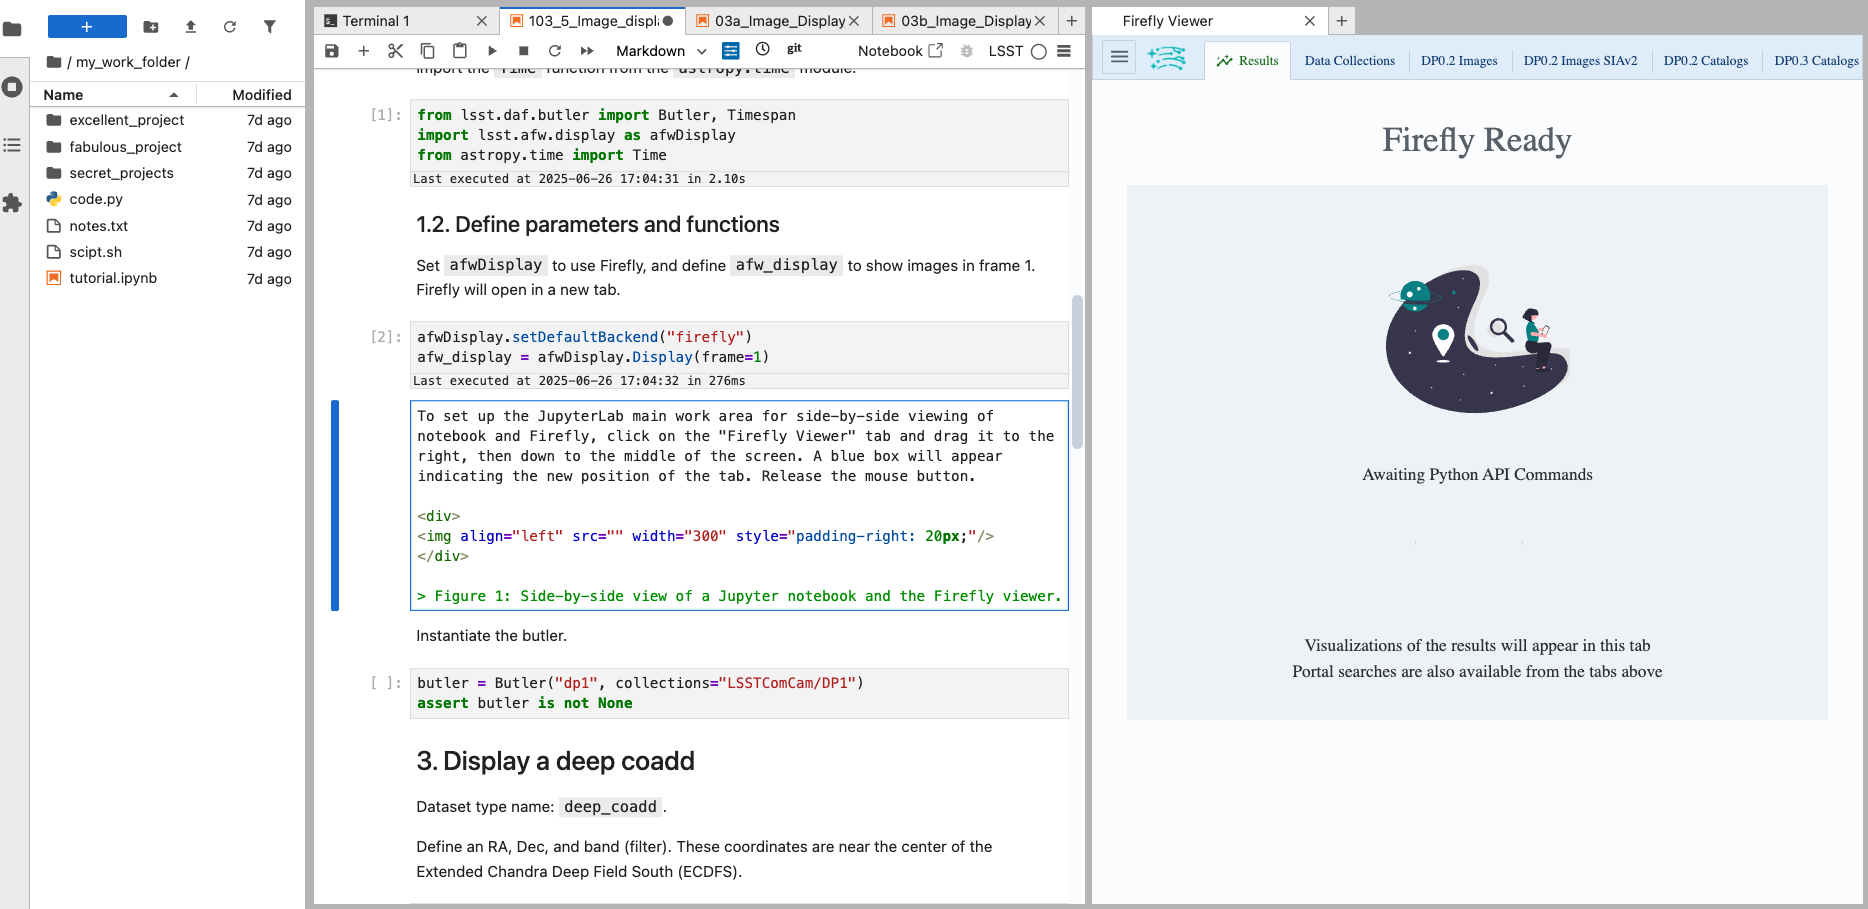
</div>

> Figure 1: Side-by-side view of a Jupyter notebook and the Firefly viewer.

## 3. Display an image

Define an RA, Dec, and band (filter).
These coordinates are near the center of the Extended Chandra Deep Field South (ECDFS).

In [ ]:
ra = 53.076
dec = -28.110
band = 'r'

Define a query string using the coordinates and band as search constraints.
Query the butler for matching `deep_coadd` images and retrieve the first on the list.

In [ ]:
query = "band.name = :band AND patch.region OVERLAPS POINT(:ra, :dec)"
bind = {'band': band, 'ra': ra, 'dec': dec}
refs = butler.query_datasets("deep_coadd", where=query,
                             bind=bind, order_by='patch')
deep_coadd = butler.get(refs[0])

Display the retrieved image in Firefly.

In [ ]:
afw_display.image(deep_coadd)

The displayed image should look like this.

<div>
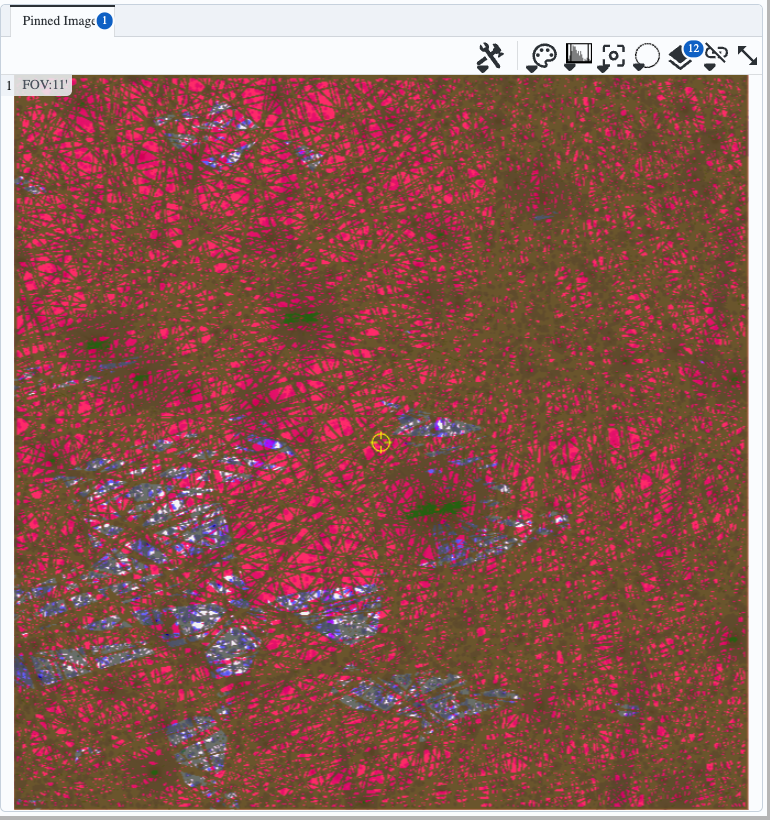
</div>

> Figure 2: A deep coadd in the default display mode: with the mask overlay.

## 4. Manipulate the display

### 4.1. Set mask transparency

Reset the mask transparency to 100% transparent.

In [ ]:
afw_display.setMaskTransparency(100)

The displayed image should look like this.

<div>
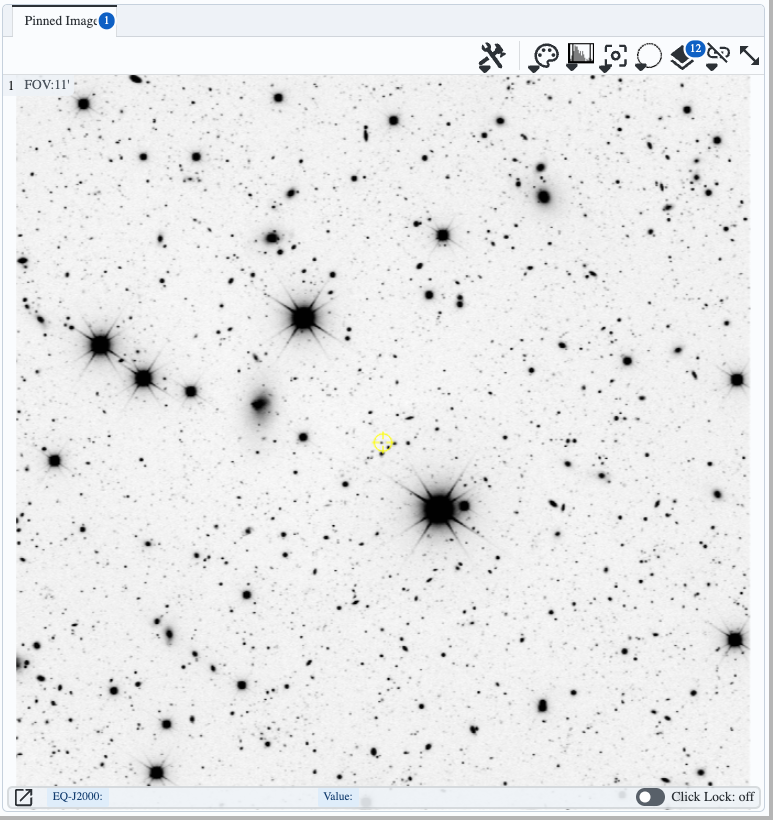
</div>

> Figure 3: A deep coadd without the mask.

### 4.2. Set the scale

Control the colorbar scaling algorithm with the display’s scale method.

Set the scale to asinh stretch with explicit minimum (black) and maximum (white) values.

In [ ]:
afw_display.scale("asinh", -5, 100)

Use an automatic algorithm like `zscale` (or `minmax`) to select the white and black thresholds.

In [ ]:
afw_display.scale("asinh", "zscale")

## 5. Manipulate the mask

The display framework renders each plane (each bit) of the mask in a different color.

Reset mask transparency to 50% transparent.

In [ ]:
afw_display.setMaskTransparency(50)

Print the list of mask keys and color.

In [ ]:
mask = deep_coadd.getMask()
for mask_key, bit in mask.getMaskPlaneDict().items():
    print('{} ({}): {}'.format(mask_key, bit,
                               afw_display.getMaskPlaneColor(mask_key)))

Click on the layers icon (red arrow) to open the layers pop-up box in the Firefly display and see the mask names and colors.

<div>
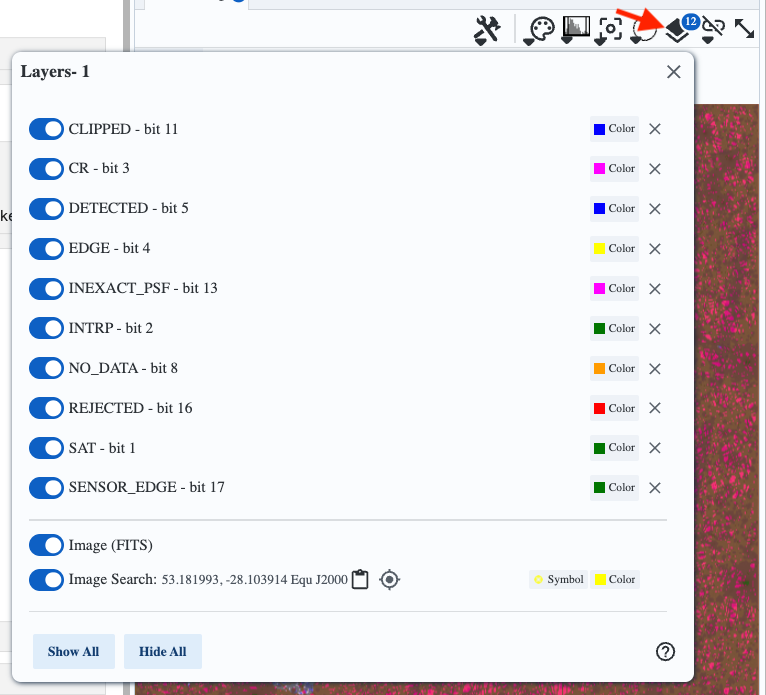
</div>

> Figure 4: The layers overlay with all masks toggled to display.


### 5.1. Select mask layers to display

Set all mask layers to 100% transparent.

In [ ]:
afw_display.setMaskTransparency(100)

Set the DETECTED mask layer, indicating pixels that are part of a detected object, to 80% transparent to show only that layer.

In [ ]:
afw_display.setMaskTransparency(80, 'DETECTED')

Re-display all masks by setting all mask layers to 50% transparent.

In [ ]:
afw_display.setMaskTransparency(50)

Open the layers pop-up box again and untoggle all but the DETECTED mask layer.

<div>
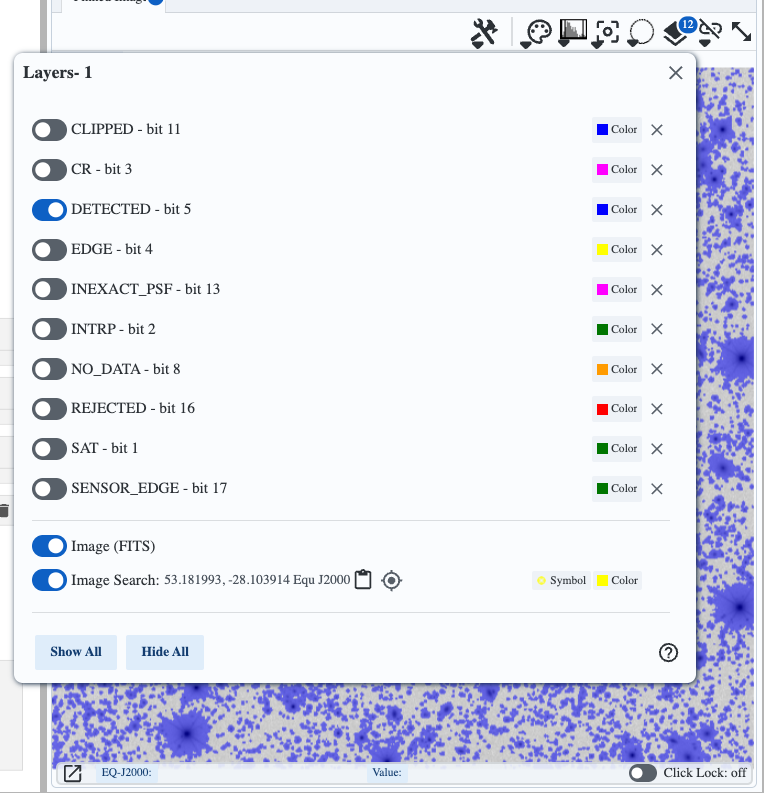
</div>

> Figure 5: The layers overlay with all masks toggled off except DETECTED.

Click the X in the upper right corner of the window to dismiss it.

### 5.1. Change the mask colors


The Wikipedia page for 
[X11 color names](https://en.wikipedia.org/wiki/X11_color_names)
has a table with color swatches and their hexadecimal format.

Set all masks to be transparent and then only the DETECTED mask to be 80% transparent.

In [ ]:
afw_display.setMaskTransparency(100)
afw_display.setMaskTransparency(80, 'DETECTED')

Change the DETECTED mask plane color to "Deep Pink", `#FF1493`.

In [ ]:
afw_display.setMaskPlaneColor('DETECTED', '#FF1493')

Re-display the `deep_coadd` to see the new mask color.

In [ ]:
afw_display.image(deep_coadd)

To change the mask color from within Firefly, click on the color button for the DETECTED mask layer (red arrow) to open the color picker, and choose cyan.


<div>
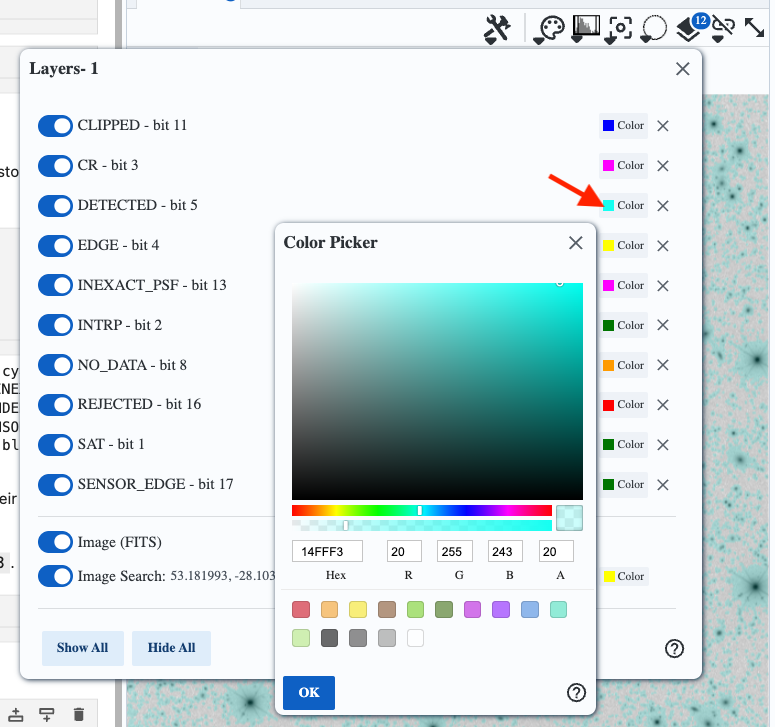
</div>

> Figure 6: The color for the DETECTOR mask has been reset to cyan.

Click "OK" to dismiss the color picker.


**Notice:** Modifications to the displayed masked colors made via `afw_display` commands will be mirrored in the Firefly overlay display panel.
However, changes performed in the Firefly overlay display panel might not be mirrored in the `afw_display` variables.

## 6. Plot markers on the image

Use the `dataId` for the `deep_coadd` image to retrieve the `object` table for the tract.

In [ ]:
dataId = refs[0].dataId

Retrieve the `patch` and the objects' x and y coordinates.

In [ ]:
use_columns = ['objectId', 'patch',
               'r_centroid_x', 'r_centroid_y']
objects = butler.get('object', tract=dataId.get('tract'),
                     parameters={'columns': use_columns})

Identify objects in the patch of the displayed `deep_coadd` image.

In [ ]:
tx = np.where(objects['patch'] == dataId.get('patch'))[0]
print(len(tx))

Use buffering to display orange circles at the location of every object.

In [ ]:
with afw_display.Buffering():
    for i in tx:
        afw_display.dot('o', objects[i]['r_centroid_x'],
                        objects[i]['r_centroid_y'],
                        size=20, ctype='orange')

The result should look like this.

<div>
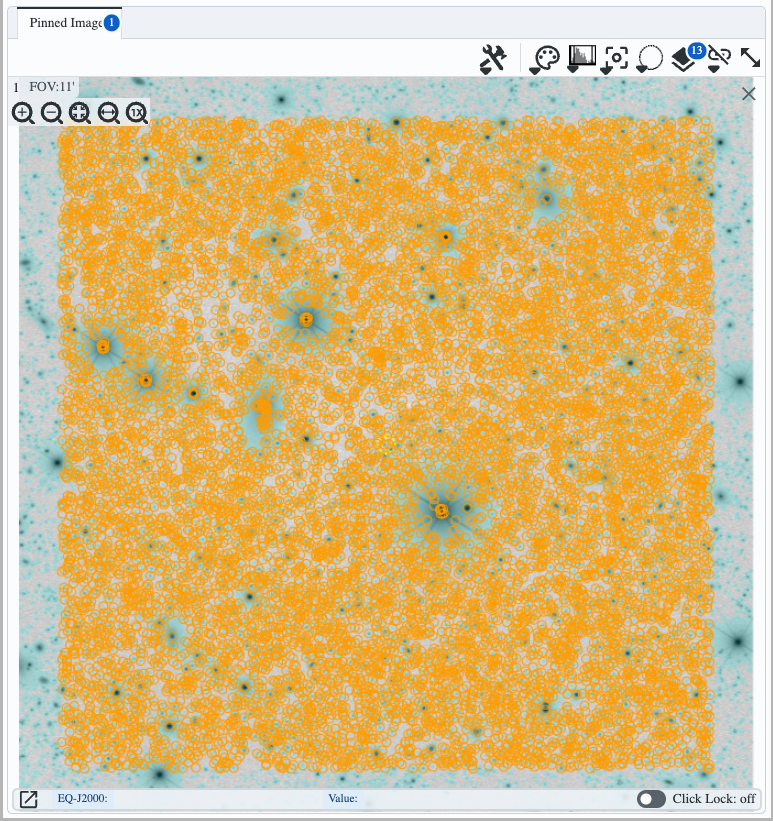
</div>

> Figure 7: Objects in the patch plotted as orange circles.

**Why are no objects near the edges plotted?**

The `deep_coadd` images are per-patch, and patches and `deep_coadd` images overlap at their edges. The `object` table is by `tract`, and has no duplicates -- there is only one row per detected object. For every object the `patch` column is the patch for which they are closest to the center. The stars and galaxies near the edges of the displayed `deep_coadd` image are listed as belonging to the adjacent patch.